In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
df= pd.read_csv('/content/drive/MyDrive/brca.csv')
df.head()

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

In [5]:
#Renaming the columns
df.rename(columns = {"Unnamed: 0" : "unnamed",'x.radius_mean': 'radius_mean','x.texture_mean':'texture_mean',
                            'x.perimeter_mean':'perimeter_mean','x.area_mean':'area_mean','x.smoothness_mean':'smoothness_mean',
                            'x.compactness_mean':'compactness_mean','x.concavity_mean':'concavity_mean','x.concave_pts_mean':'concave_pts_mean',
                            'x.symmetry_mean':'symmetry_mean','x.fractal_dim_mean':'fractal_dim_mean','x.radius_se':'radius_se',
                            'x.texture_se':'texture_se','x.perimeter_se':'perimeter_se','x.area_se':'area_se','x.smoothness_se':'smoothness_se',
                            'x.compactness_se':'compactness_se','x.concavity_se':'concavity_se','x.concave_pts_se':'concave_pts_se',
                            'x.symmetry_se':'symmetry_se','x.fractal_dim_se':'fractal_dim_se','x.radius_worst':'radius_worst','x.texture_worst':'texture_worst',
                            'x.perimeter_worst':'perimeter_worst','x.area_worst':'area_worst','x.smoothness_worst':'smoothness_worst','x.compactness_worst':'compactness_worst',
                            'x.concavity_worst':'concavity_worst','x.concave_pts_worst':'concave_pts_worst','x.symmetry_worst':'symmetry_worst',
                            'x.fractal_dim_worst':'fractal_dim_worst'},inplace = True)

In [6]:
df.columns


Index(['unnamed', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_pts_mean', 'symmetry_mean', 'fractal_dim_mean', 'radius_se',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_pts_se', 'symmetry_se',
       'fractal_dim_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave_pts_worst', 'symmetry_worst',
       'fractal_dim_worst', 'y'],
      dtype='object')

In [7]:
#removing the unnamed column
df = df.drop(columns='unnamed',axis = 1)

In [8]:
#Dropping duplicates and null values
df =df.drop_duplicates()
df = df.dropna()

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [10]:
df.isnull().sum()

radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
concave_pts_mean     0
symmetry_mean        0
fractal_dim_mean     0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
concave_pts_se       0
symmetry_se          0
fractal_dim_se       0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
concave_pts_worst    0
symmetry_worst       0
fractal_dim_worst    0
y                    0
dtype: int64

In [11]:
df['y'].value_counts()

B    357
M    212
Name: y, dtype: int64

In [12]:
#Changing y values to numbers
df['y'] = df['y'].replace(['M','B'],[1,0])
df['y'].value_counts()

0    357
1    212
Name: y, dtype: int64

In [13]:
#Infilating the dataset to make it larger
n_replicas = 50
df = pd.DataFrame(np.repeat(df.values.astype(float),n_replicas,axis = 0),columns = df.columns)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,fractal_dim_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst,y
0,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259,0.0
1,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259,0.0
2,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259,0.0
3,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259,0.0
4,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,...,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259,0.0


In [15]:
df.shape

(28450, 31)

In [16]:
df.groupby('y').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_pts_mean,symmetry_mean,fractal_dim_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_pts_worst,symmetry_worst,fractal_dim_worst
y,,,,,,,,,,,,,,,,,,,,,
0.0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1.0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [17]:
#Separating the features and target
X = df.drop(columns = 'y',axis=1)
Y = [int(x) for x in df['y']]
Y = pd.Series(Y)
print(Y)

0        0
1        0
2        0
3        0
4        0
        ..
28445    1
28446    1
28447    1
28448    1
28449    1
Length: 28450, dtype: int64


In [18]:
#Splitting the dataset into Training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,stratify = Y,random_state=10)
print('X shape',X.shape,'X_train shape',X_train.shape,'X_test_shape',X_test.shape)

X shape (28450, 30) X_train shape (22760, 30) X_test_shape (5690, 30)


In [19]:
#Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [20]:
# Buiding the Neural Network

#Importing the required libraries
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)

In [21]:
# Setting up the layers of the neural network
model = keras.Sequential([
    #flatten features of input layer
    keras.layers.Flatten(input_shape = (30,)),
    #hidden layers
    keras.layers.Dense(20,activation = 'relu'),
    keras.layers.Dense(15,activation = 'relu'),
    keras.layers.Dense(10,activation = 'relu' ),
    #Output layer--neurons equal to the number of output classes
    keras.layers.Dense(2,activation = 'sigmoid')
])

In [22]:
# Model Compillation
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'Accuracy'
)


In [23]:
# Training the Neural Network

history =model.fit(X_train,Y_train,validation_split= 0.1,epochs =20)


Epoch 1/20
641/641 [==============================] - 3s 3ms/step - loss: 0.1036 - Accuracy: 0.9597 - val_loss: 0.0216 - val_Accuracy: 0.9934
Epoch 2/20
641/641 [==============================] - 1s 2ms/step - loss: 0.0103 - Accuracy: 0.9979 - val_loss: 0.0035 - val_Accuracy: 1.0000
Epoch 3/20
641/641 [==============================] - 1s 2ms/step - loss: 0.0020 - Accuracy: 1.0000 - val_loss: 0.0010 - val_Accuracy: 1.0000
Epoch 4/20
641/641 [==============================] - 2s 2ms/step - loss: 5.9188e-04 - Accuracy: 1.0000 - val_loss: 3.0045e-04 - val_Accuracy: 1.0000
Epoch 5/20
641/641 [==============================] - 1s 2ms/step - loss: 2.2385e-04 - Accuracy: 1.0000 - val_loss: 1.4069e-04 - val_Accuracy: 1.0000
Epoch 6/20
641/641 [==============================] - 2s 3ms/step - loss: 1.1450e-04 - Accuracy: 1.0000 - val_loss: 7.9128e-05 - val_Accuracy: 1.0000
Epoch 7/20
641/641 [==============================] - 2s 3ms/step - loss: 6.5348e-05 - Accuracy: 1.0000 - val_loss: 4.5475e-

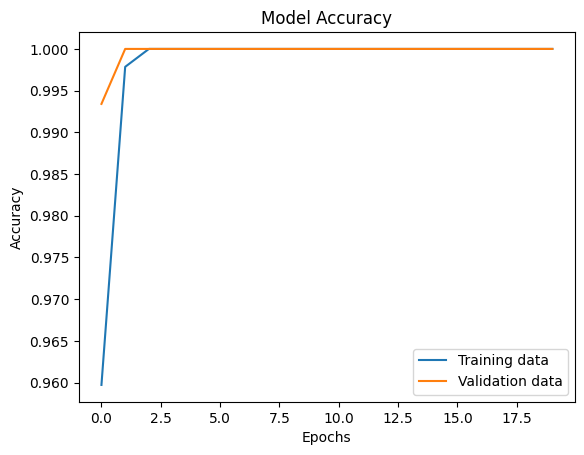

In [24]:
# Visualizing the accuracy and the loss
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Training data','Validation data'],loc = 'lower right')


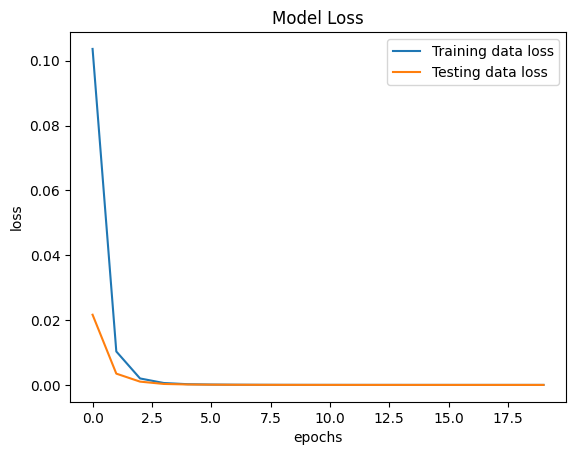

In [25]:
#loss Visualization
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.legend(['Training data loss','Testing data loss'],loc = 'upper right')

In [26]:
# Accuracy of the model on test data
prediction_test_data = model.predict(X_test)
print(prediction_test_data.shape)
print(prediction_test_data[0])
print(prediction_test_data)

178/178 [==============================] - 1s 4ms/step
(5690, 2)
[9.9959779e-01 4.2603686e-04]
[[9.9959779e-01 4.2603686e-04]
 [7.2461324e-13 1.0000000e+00]
 [1.0000000e+00 9.9355515e-12]
 ...
 [1.0000000e+00 2.1223825e-10]
 [1.0000000e+00 1.4992778e-15]
 [9.7743832e-05 9.9998552e-01]]


In [27]:
#Model Evaluation
loss,accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

178/178 [==============================] - 0s 2ms/step - loss: 5.4602e-07 - Accuracy: 1.0000
1.0


In [28]:
input_data = (11.89,18.35,77.32,432.2,0.09363,0.1154,0.06636,0.03142,0.1967,0.06314,0.2963,1.563,2.087,21.46,0.008872,0.04192,0.05946,
              0.01785,0.02793,0.004775,13.25,27.1,86.2,531.2,0.1405,
              0.3046,0.2806,0.1138,0.3397,0.08365)
#input as np
input_np = np.asarray(input_data)
#input reshaping
input_reshaped = input_np.reshape(1,-1)
#input_scaling
input_scaled = scaler.fit_transform(input_reshaped)
#prediction
prediction = model.predict(input_scaled)
#prediction label
pred_label = [np.argmax(prediction)]
print(prediction)
print(pred_label[0])
if pred_label[0] == 0:
  print('Benign Breast Cancer Turmor')
else:
  print('Malignant Breast Cancer Turmor')

1/1 [==============================] - 0s 21ms/step
[[0.35158098 0.7323025 ]]
1
Malignant Breast Cancer Turmor
